In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [3]:
n = pypsa.Network("results/testBiomass5/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7f27a5eb8bb0>,
 <matplotlib.collections.LineCollection at 0x7f27a4ae71c0>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


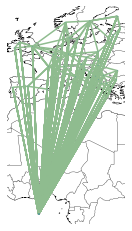

In [4]:
n.plot()

In [4]:
n.objective / 1e9 #billion EUR p.a.

530.8101362014281

In [21]:
import cartopy.crs as ccrs

In [22]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


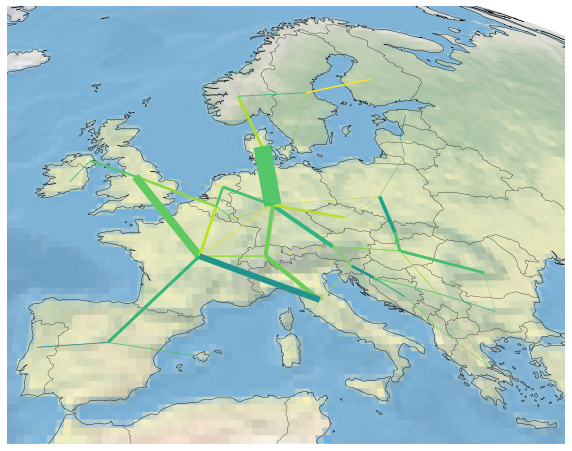

In [23]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [9]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac         0.015276
AL0 0 onwind             0.015602
AL0 0 solar          17868.707208
AT0 0 onwind             0.032205
AT0 0 ror             4478.505031
                        ...      
SK0 0 onwind             0.042093
SK0 0 ror              641.330000
SK0 0 solar              0.440233
EU gas              814794.679088
EU oil              969562.149129
Name: p_nom_opt, Length: 152, dtype: float64

In [20]:
n.links.loc[n.links.carrier=='Fischer-Tropsch'].p_nom_opt.sort_values(ascending=False).head(50)

name
IT0 0 Fischer-Tropsch    29470.906569
BG0 0 Fischer-Tropsch    19946.105634
ES0 0 Fischer-Tropsch    10495.677745
GR0 0 Fischer-Tropsch     6043.203729
IT1 0 Fischer-Tropsch      539.335316
ES2 0 Fischer-Tropsch        0.308374
PT0 0 Fischer-Tropsch        0.118204
IE4 0 Fischer-Tropsch        0.005682
GB4 0 Fischer-Tropsch        0.005673
GB5 0 Fischer-Tropsch        0.005318
DK0 0 Fischer-Tropsch        0.005044
DK3 0 Fischer-Tropsch        0.004970
NL0 0 Fischer-Tropsch        0.004674
BE0 0 Fischer-Tropsch        0.004647
LU0 0 Fischer-Tropsch        0.004647
FR0 0 Fischer-Tropsch        0.004563
DE0 0 Fischer-Tropsch        0.004534
NO3 0 Fischer-Tropsch        0.004524
SE3 0 Fischer-Tropsch        0.004471
FI3 0 Fischer-Tropsch        0.004410
EE6 0 Fischer-Tropsch        0.004377
CH0 0 Fischer-Tropsch        0.004316
CZ0 0 Fischer-Tropsch        0.004310
AT0 0 Fischer-Tropsch        0.004307
LT6 0 Fischer-Tropsch        0.004300
PL0 0 Fischer-Tropsch        0.004296
RO0 0 F

In [19]:
n.links.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
BEV charger                                           2394.030982
BioSNG                                                   0.000014
DAC                                                      0.000031
DC                                                     506.560598
Fischer-Tropsch                                         66.495792
H2 Electrolysis                                        249.518059
H2 Fuel Cell                                             0.000191
H2 pipeline                                            153.424933
OCGT                                                   161.441703
SMR                                                      0.000199
SMR CC                                                   0.000113
Sabatier                                                 0.000111
V2G                                                   2394.030982
battery charger                                          0.005490
battery discharger                                       0.005603
bi

In [12]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,9.864504
2013-01-05 01:00:00,20.294053
2013-01-09 02:00:00,30.723468
2013-01-13 03:00:00,41.069340
2013-01-17 04:00:00,51.501747
...,...
2013-12-14 14:00:00,771.669890
2013-12-18 15:00:00,781.577884
2013-12-22 16:00:00,790.878394


In [13]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-101695.912492
2013-01-05 01:00:00,-107521.124310
2013-01-09 02:00:00,-107519.748441
2013-01-13 03:00:00,-106658.471343
2013-01-17 04:00:00,-107550.590320
...,...
2013-12-14 14:00:00,-105226.546749
2013-12-18 15:00:00,-102144.264729
2013-12-22 16:00:00,-95881.544361


In [14]:
n.stores.e_nom_opt

name
co2 atmosphere           2.299356e+08
co2 stored               8.037474e+08
EU gas Store             2.986480e+08
DE0 0 H2 Store           3.715271e+01
DK0 0 H2 Store           3.446120e+01
                             ...     
RO0 0 battery storage    2.709375e+04
RS0 0 battery storage    2.028825e+04
SE3 0 battery storage    2.750344e+04
SI0 0 battery storage    6.984375e+03
SK0 0 battery storage    1.093313e+04
Name: e_nom_opt, Length: 677, dtype: float64

In [15]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry           0.020729
DE0 0 solid biomass for lowT industry CC     2429.702170
DE0 0 methane for lowT industry                 0.013968
DE0 0 methane for lowT industry CC          19732.565603
DE0 0 H2 for lowT industry                      0.009814
Name: p_nom_opt, dtype: float64

In [17]:
n.links.loc[n.links.carrier=='digestable biomass to gas'].p_nom_opt.sort_values(ascending=False).head(50)

name
DE0 0 digestable biomass    0.006529
ES0 0 digestable biomass    0.006498
IT0 0 digestable biomass    0.006483
PL0 0 digestable biomass    0.006398
DK0 0 digestable biomass    0.006121
HU0 0 digestable biomass    0.006121
RO0 0 digestable biomass    0.005983
GB5 0 digestable biomass    0.005976
CZ0 0 digestable biomass    0.005946
PT0 0 digestable biomass    0.005939
NL0 0 digestable biomass    0.005857
BE0 0 digestable biomass    0.005837
SE3 0 digestable biomass    0.005756
IE4 0 digestable biomass    0.005752
FR0 0 digestable biomass    0.005739
DK3 0 digestable biomass    0.005660
LT6 0 digestable biomass    0.005618
SK0 0 digestable biomass    0.005569
RS0 0 digestable biomass    0.005350
EE6 0 digestable biomass    0.005078
AT0 0 digestable biomass    0.005039
LV6 0 digestable biomass    0.005039
GR0 0 digestable biomass    0.005000
FI3 0 digestable biomass    0.004880
BG0 0 digestable biomass    0.004827
CH0 0 digestable biomass    0.004789
GB4 0 digestable biomass    0.004

In [4]:
n.links.p_nom_opt.filter(regex='SE.*digestable').head(50)

name
SE3 0 manureslurry digestable biomass          0.235144
SE3 0 municipal biowaste digestable biomass    0.231566
SE3 0 sewage sludge digestable biomass         0.251140
SE3 0 straw digestable biomass                 0.238556
SE3 0 digestable biomass                       1.006718
Name: p_nom_opt, dtype: float64

In [18]:
n.links.p_nom_opt.filter(regex='DE.*solid').head(50) #MW

name
DE0 0 solid biomass for lowT industry         14357.187625
DE0 0 solid biomass for lowT industry CC          0.036363
DE0 0 poplar solid biomass                     2501.988241
DE0 0 forest residues solid biomass           54210.588750
DE0 0 industry wood residues solid biomass    10535.831616
DE0 0 import1 solid biomass                       0.014357
DE0 0 import2 solid biomass                       0.016148
DE0 0 import3 solid biomass                       0.015348
DE0 0 import4 solid biomass                       0.014601
DE0 0 import5 solid biomass                       0.013659
DE0 0 import6 solid biomass                       0.012417
DE0 0 import7 solid biomass                       0.011140
DE0 0 import8 solid biomass                       0.008691
DE0 0 import9 solid biomass                       0.009577
DE0 0 solid biomass to gas                        0.000350
DE0 0 urban central solid biomass CHP             0.014561
DE0 0 urban central solid biomass CHP CC      47286

In [16]:
n.links.p_nom_opt.filter(regex='Tropsch').sum()#head(50) #GW?

0.2288007387006432

In [13]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


In [12]:
n.links_t.p0.filter(regex='biomass').sum().sum()*97 * 3.6/1e9 #EJ

14.352618166342994

In [26]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


<AxesSubplot:xlabel='name'>

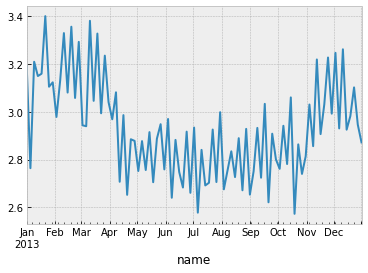

In [15]:
(n.loads_t.p_set.filter(regex='DE.*transport oil').sum(axis=1) *97 * 3.6 / 1e6).plot() #PJ

In [16]:
n.loads_t.p.filter(regex='electricity').sum().sum()*3.6/1e6

63.47249999999998

In [14]:
n.stores_t.p.filter(regex='import').sum().sum()*97*3.6/1e9

0.09952476548443973

In [13]:
n.stores_t.p.filter(regex='digestable biomass').sum().sum()*97*3.6/1e6

0.0014151303794513017

In [11]:
n.stores_t.e.filter(regex='import').head(5)

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.786738e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-05 01:00:00,1.786436e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-09 02:00:00,1.786126e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-13 03:00:00,1.785816e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-17 04:00:00,1.785507e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08


In [10]:
n.links_t.p0.filter(regex='solid biomass').sum().sum() * 97 * 3.6 / 1e9 #EJ

12.606617693663784

In [9]:
(n.stores_t.e.filter(regex='import.*solid biomass').max() - n.stores_t.e.filter(regex='import.*solid biomass').min()) * 3.6 / 1e9 #EJ biomass import

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


name
import1 solid biomass    9.785144e-02
import2 solid biomass    1.549589e-06
import3 solid biomass    9.637059e-07
import4 solid biomass    7.568449e-07
import5 solid biomass    6.477790e-07
import6 solid biomass    5.797516e-07
import7 solid biomass    5.265721e-07
import8 solid biomass    4.856146e-07
import9 solid biomass    4.502324e-07
dtype: float64

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


<AxesSubplot:xlabel='name'>

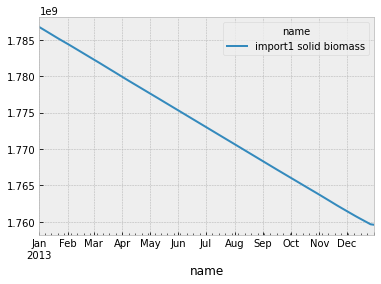

In [9]:
n.stores_t.e.filter(regex='import1 solid biomass').plot()

In [60]:
n.stores_t.e.filter(regex='import.*solid biomass').head()

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.786740e+09,2.777777e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-05 01:00:00,1.786442e+09,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-09 02:00:00,1.786140e+09,2.777776e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08
2013-01-13 03:00:00,1.785836e+09,2.777776e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08
2013-01-17 04:00:00,1.785533e+09,2.777776e+08,2.777776e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08,2.777777e+08


In [8]:
n.stores_t.e.filter(regex='import.*solid biomass')

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.786738e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-05 01:00:00,1.786436e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-09 02:00:00,1.786126e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-13 03:00:00,1.785816e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
2013-01-17 04:00:00,1.785507e+09,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08,2.777778e+08
...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,1.760516e+09,2.777774e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777777e+08
2013-12-18 15:00:00,1.760224e+09,2.777774e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777777e+08
2013-12-22 16:00:00,1.759932e+09,2.777774e+08,2.777775e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777776e+08,2.777777e+08


In [7]:
n.links_t.p0.filter(regex='biomass to liquid').sum().sum() * 97 *3.6 / 1e9

0.9672840000880282

In [8]:
n.loads_t.p_set.filter(regex='transport oil').sum().sum() * 97 * 3.6 / 1e9

1.6656193454359893

In [7]:
n.links_t.p0.filter(regex='Fischer-Tropsch').sum().sum() * 97 *3.6 / 1e9 #EJ

4.240617286869876

In [4]:
n.links_t.p0.filter(regex='biomass to liquid').sum().sum() * 97 * 3.6 /1e9 #EJ

4.4592840001896095

In [8]:
n.loads_t.p.filter(regex='land transport oil|naphtha|kerosene|oil for shipping|oil boiler').sum().sum() * 97 * 3.6 /1e9 #EJ

7.8506502894956744

In [16]:
n.loads_t.p.filter(regex='naphtha').sum().sum() * 97 * 3.6 / 1e9

2.8240354109589036

In [17]:
n.loads_t.p.filter(regex='kerosene').sum().sum() * 97 * 3.6 / 1e9

2.22094235510509

In [18]:
n.loads_t.p.filter(regex='shipping').sum().sum() * 97 * 3.6 / 1e9

2.052095720392242

In [10]:
n.loads_t.p.sum().sum() * 97 * 3.6 /1e9

36.00663123222332

In [9]:
n.generators_t.p.filter(regex='EU oil').sum() *3.6/1e6

name
EU oil    8.154080e-07
dtype: float64

In [43]:
n.stores_t.e.filter(regex='EU oil').tail(1)

name,EU oil Store
name,
2013-12-30 18:00:00,3.977915e+08


In [41]:
n.components["Generator"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus,string,NaN,,name of bus to which generator is attached,Input (required),True,False,<class 'str'>,object
control,string,NaN,PQ,"P,Q,V control strategy for PF, must be ""PQ"", ""...",Input (optional),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for generator type. Not yet implem...,Input (optional),True,False,<class 'str'>,object
p_nom,float,MW,0.0,Nominal power for limits in OPF.,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MW,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MW,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64
p_min_pu,static or series,per unit,0.0,The minimum output for each snapshot per unit ...,Input (optional),True,True,<class 'float'>,float64
